In [16]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

In [17]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [18]:
import os, cv2

In [19]:
from PIL import Image

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

In [21]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = 'C:/Users/master15/Desktop/0820Resnet/data_set/'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 4155
테스트 데이터셋 크기: 1022
클래스: ['Heart', 'Oblong', 'Oval', 'Round', 'Square']


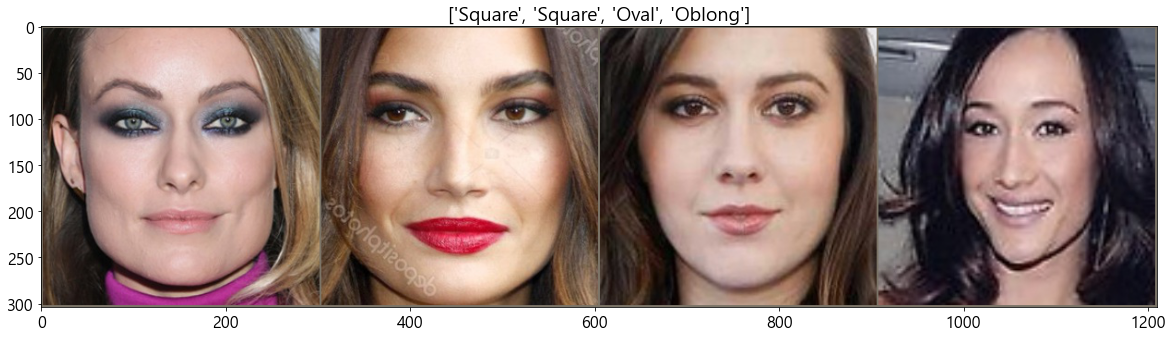

In [7]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [8]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 3개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 5)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
num_epochs = 50
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 1.3887 Acc: 46.5704% Time: 938.2327s
#1 Loss: 0.9335 Acc: 65.3430% Time: 1877.0668s
#2 Loss: 0.7014 Acc: 75.0903% Time: 2812.9566s
#3 Loss: 0.6163 Acc: 78.3393% Time: 3754.0384s
#4 Loss: 0.4765 Acc: 83.4898% Time: 4689.0320s
#5 Loss: 0.4172 Acc: 85.3189% Time: 5625.0468s
#6 Loss: 0.3442 Acc: 88.7365% Time: 6567.7298s
#7 Loss: 0.2729 Acc: 91.0229% Time: 7504.2226s
#8 Loss: 0.2160 Acc: 93.0445% Time: 8440.2940s
#9 Loss: 0.1805 Acc: 93.8147% Time: 9383.2842s
#10 Loss: 0.1813 Acc: 93.9832% Time: 10319.2095s
#11 Loss: 0.1494 Acc: 95.3069% Time: 11262.2899s
#12 Loss: 0.1062 Acc: 96.7028% Time: 12206.2898s
#13 Loss: 0.1146 Acc: 96.2455% Time: 13144.4758s
#14 Loss: 0.0816 Acc: 97.6173% Time: 14087.4047s
#15 Loss: 0.0942 Acc: 97.2082% Time: 15025.3935s
#16 Loss: 0.0778 Acc: 97.7136% Time: 15961.7574s
#17 Loss: 0.0508 Acc: 98.5078% Time: 16904.7434s
#18 Loss: 0.0593 Acc: 98.3153% Time: 17841.7337s
#19 Loss: 0.0517 Acc: 98.3393% Time: 18778.2943s
#20 Loss: 0.0455 Acc: 98.8929% Time: 1972

In [13]:
# Save model for later use
#torch.save(model,'C:/Users/master15/Desktop/0812resnet/nose_classifier_model.h5')

In [ ]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

## 모델 전체 저장
- 모델 전체를 저장한다는 것의 의미는 모델 파라미터 뿐만 아니라, 옵티마이저(Optimizer), 에포크, 스코어 등 모든 상태를 저장한다는 것이다. 
- 만약 나중에 이어서 학습을 한다던지, 코드에 접근할 권한이 없는 사용자가 모델을 사용할 수 있도록 허락해주고 싶을 때 등의 경우에 사용하는 것이 바람직하다. 
- 모델 전체를 저장하는 만큼, 상대적으로 더 큰 용량을 가지게 된다.

## 모델의 state_dict만 저장
- Pytorch에서 모델의 state_dict은 학습가능한 매개변수가 담겨있는 딕셔너리(Dictionary)이다. 
- 가중치와 편향이 이에 해당한다. 
- 그러나 매개변수 이외에는 정보가 담겨있지 않기 때문에, 코드 상으로 모델이 구현되어 있는 경우에만 로드하는 방법을 통해 사용할 수 있다. 
- state_dict만 저장하면 파일의 용량이 가벼워진다는 장점이 있다.

In [13]:
PATH = 'C:/Users/master15/Desktop/0820resnet/data_set/'

torch.save(model, PATH + 'model.pt')  # 전체 모델 저장
torch.save(model.state_dict(), PATH + 'model_state_dict.pt')  # 모델 객체의 state_dict 저장
torch.save({
    'model': model.state_dict(),
    'optimizer': optimizer.state_dict()
}, PATH + 'all.tar') 

In [ ]:
end

## 모델 불러오기

In [22]:
PATH = 'C:/Users/master15/Desktop/0820resnet/Resnet_model/'

In [23]:
# Load model
nose_model = torch.load(PATH + 'model.pt')

In [24]:
nose_model.parameters

<bound method Module.parameters of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


## 데이터 전처리

In [37]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
new_transforms = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

In [41]:
data_dir = 'C:/Users/master15/Desktop/0820Resnet/Resnet_model'

In [42]:
datasets = datasets.ImageFolder(os.path.join(data_dir), new_transforms)

AttributeError: 'ImageFolder' object has no attribute 'ImageFolder'

In [32]:
dataloader = torch.utils.data.DataLoader(datasets, batch_size=4, shuffle=True, num_workers=4)

AttributeError: 'ImageFolder' object has no attribute 'ImageFolder'

## 불러온 이미지 보기

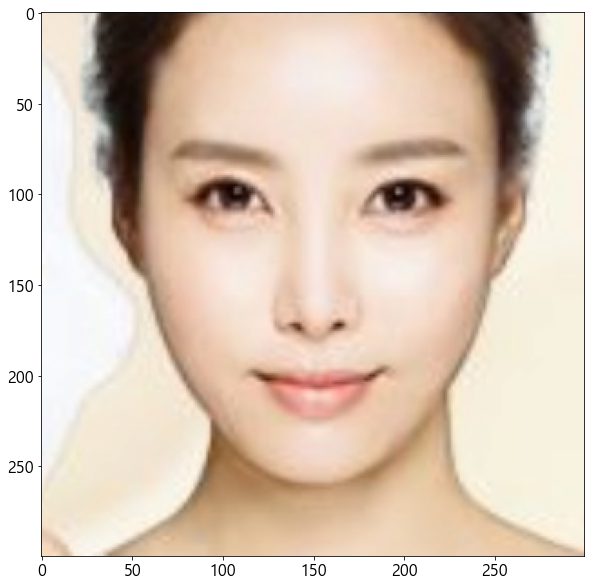

In [26]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title='')

In [27]:
# 학습 데이터를 배치 단위로 불러오기
iterator = iter(dataloader)
inputs, classes = next(iterator)
outputs = nose_model(inputs)
 _, preds = torch.max(outputs, 1)

In [31]:
# 한 배치의 첫 번째 이미지에 대하여 결과 시각화
print(f'[예측 결과: {class_names[preds[0]]}]')

[예측 결과: Oval]


[예측 결과: Oval]


[예측 결과: LongWide_2] (실제 정답: LongWide_2)


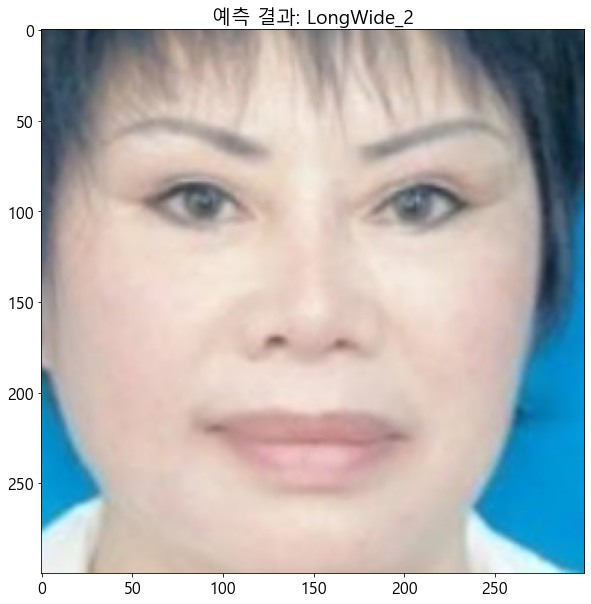

[Test Phase] Loss: 0.0004 Acc: 1.8349% Time: 1.6625s


In [40]:
nose_model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = nose_model(inputs) # load한 모델 사용
        _, preds = torch.max(outputs, 1) # 예측 값중에 하나만 가져온다.
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

In [54]:
nose_model.eval()
start_time = time.time()
total=0

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = nose_model(inputs) # load한 모델 사용
        _, preds = torch.max(outputs, 1) # 예측 값중에 하나만 가져온다.
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total+=labels.size(0)

print(100*running_corrects/ total)
       

tensor(100.)


## accurcy

In [55]:
correct= 0
total=0

with torch.no_grad():
    for data in dataloader:
        inputs,labels = data
        outputs = nose_model(inputs) # load한 모델 사용
        _, preds = torch.max(outputs, 1) # 예측 값중에 하나만 가져온다.
        total+=labels.size(0)
        correct+= (preds==labels).sum().item()

print(100*correct/ total)
       

100.0
